### Exercise 1

Consider a square potential of width w and height V. Using Schrodinger equation it is possible to show that the energy levels $E_n$ of a quantum particle of mass $m$ inside the well satisfy the relations:

\begin{equation}
\tan{\sqrt{w^2 m E_n / 2 \hbar^2}} = \sqrt{ {(V-E_n)/E_n} }, \;\;\; n = 0,2,4,\ldots
\end{equation}
\begin{equation}
\tan{\sqrt{w^2 m E_n / 2 \hbar^2}} = -\sqrt{ {E_n/(V-E_n)} }, \;\;\; n = 1,3,5,\ldots
\end{equation}

Consider an electron (${m = 0.51 \times 10^6 / c^2}$ eV, $c = 3 \times 10^8 \, {\rm m/s}$) in a well with $V = 20$ eV and $w = 10^{-9}$ m. For the reduced Planck constant take the value $\hbar = 6.582 \times 10^{-16}$ eV s


1)  Plot on the same graph the three functions $y_1 = \tan{\sqrt{w^2 m E / 2 \hbar^2}}$, $y_2 = \sqrt{ {(V-E)/E} }$, $y_3 = -\sqrt{ {E/(V-E)} }$, from $E = 0$ to $E = 6$ eV. You can use this plot to get a by eye estimate of the energy levels.

2) Calculate the values of $E_n$, for $n = 0,1,2,3$, to an accuracy of $0.001$ eV.


In [9]:
import numpy as np
import matplotlib.pyplot as plt



In [60]:
w = 10**(-9)
h_bar = 6.582*10**(-16)
V = 20
m = (0.51*10**6) / (3e8)**2
E = np.linspace(0.0001,6,500)

In [61]:
y1 = lambda E: np.tan(np.sqrt(m*E*w**2/(2*h_bar**2)))
y2 = lambda E: np.sqrt((V-E)/E)
y3 = lambda E: -np.sqrt(E/(V-E))
E = np.arange(0.001,6,0.001)

In [63]:
arr = y1(E)
arr[:-1][np.diff(arr) < 0] = np.nan

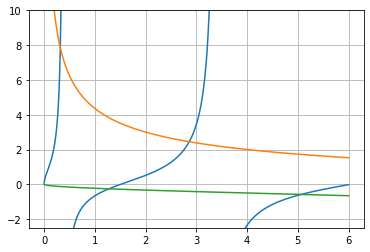

In [70]:
plt.plot(E,arr)
plt.plot(E,y2(E))
plt.plot(E,y3(E))
plt.ylim(-2.5,10)
plt.xlabel('Energy')
plt.ylabel('I')
plt.grid()
plt.legend()
plt.title("Title")
plt.show()

In [51]:
c = 3e8
m = 0.51e6/(c**2)
V = 20
omega = 10e-9
h = 6.582e-16

In [67]:
def bisect(a, b, f1,f2,z, tol):
    def f(E):
        return(f1(E) - f2(E))

    fa = f(a)
    fb = f(b)
    err = 10
    m = 0.5 * (a + b)
    
    while err > tol:
        fm = f(m)

        if fa*fm > 0:
            # the root is in the right half of the interval
            a = m
            fa = fm
        else:
            # the root is in the left half of the interval
            b = m
            fb = fm

        m = 0.5 * (a + b)
        err = np.abs(a - b) / np.abs(m)
    print("E_",z,f" = {m:.3f}eV")
    return 

In [69]:
bisect(0.3,0.35,y1,y2,0,0.001)

E_ 0  = 0.319eV


### Exercise 2

Consider the following ODE (van der Pol oscillator):

$\large\frac{d^2 x}{d t^ 2} - \mu (1 - x^2)\frac{dx}{dt} + \omega^2 x = 0$

Take $\omega = 1$ and $\mu = 0.1$ (small $\mu$ limit. Initial conditions: $x = 1$ and ${dx/dt = 0}$.


- Solve the equation numerically and plot the solutions $x(t)$, ${dx/dt}$, as functions of t, from $t=0$ to $t=100$

- For the solution derived above, make now a phase space plot, i.e., plot dx/dt ("velocity") on the y-axis vs. $x(t)$ on the x-axis

- Solve again the equation with the same values of $\omega = 1$ and $\mu = 0.1$, but change initial conditions to $x = 3$ and ${dx/dt = 2}$. Make again the three plots required in the previous two points, overplotting the new solutions to the previous ones. You should verify that at large $t$ the curves converge to the same solution (attractor).

- Find the solution and make the same plots again, but now for the case $\mu = 10$ (large $\mu$ limit), leaving $\omega$ and setting initial conditions again to $x = 1$ and ${dx/dt = 0}$.

Make sure to choose a small enough step to get accurate and smooth phase space plots.

In [2]:
mu = 0.1
omega = 1

In [3]:
def RK4(dx,x_i,dy,y_i,t0,tfin,h):    
    
    N = int((tfin - t0) / h)

    t_values = np.linspace(t0, tfin, N+1)
    x_values = np.zeros(len(t_values))
    x_values[0] = x_i
    y_values = np.zeros(len(t_values))
    y_values[0] = y_i

    for i in range(0,N):
        t = t_values[i]
        x = x_values[i]
        y = y_values[i]
       
        k1_x = h/2 * dx(x,y,t)
        k1_y = h/2 * dy(x,y,t)
        
        k2_x = h/2 * dx(x+k1_x,y+k1_y,t+(h/2))  
        k2_y = h/2 * dy(x+k1_x,y+k1_y,t+(h/2)) 
            
        k3_x = h * dx(x+k2_x,y+k2_y,t+(h/2))
        k3_y = h * dy(x+k2_x,y+k2_y,t+(h/2))
        
        k4_x = h * dx(x+k3_x,y+k3_y,t+h)
        k4_y = h * dy(x+k3_x,y+k3_y,t+h)

        x_values[i+1]= x + 1/6 *(2*k1_x+4*k2_x+2*k3_x+k4_x)
        y_values[i+1]= y + 1/6 *(2*k1_y+4*k2_y+2*k3_y+k4_y)
    return(t_values,x_values,y_values)

In [5]:
def dx(x,y,t):
    return(y)
def dy(x,y,t):
    return(mu*(1-x**2)*y-x*omega**2)

In [7]:
t,x,y = RK4(dx,1,dy,0,0,100,0.1)

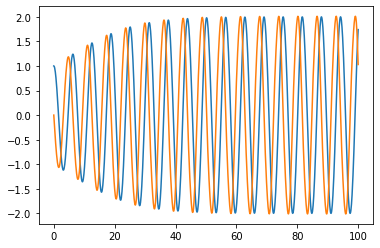

In [10]:
plt.plot(t,x)
plt.plot(t,y)

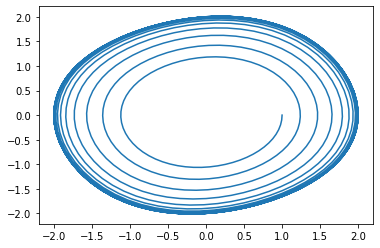

In [11]:
plt.plot(x,y)

In [12]:
t1,x1,y1 = RK4(dx,3,dy,2,0,100,0.1)

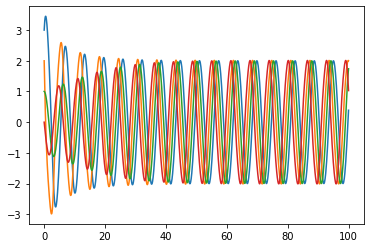

In [19]:
plt.plot(t1,x1)
plt.plot(t1,y1)
plt.plot(t,x)
plt.plot(t,y)

Text(0, 0.5, 'Velocity')

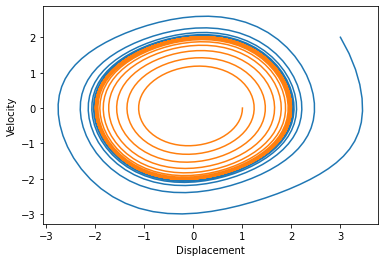

In [20]:
plt.plot(x1,y1)
plt.plot(x,y)
plt.xlabel('Displacement')
plt.ylabel('Velocity')

In [29]:
mu = 10
t2,x2,y2 = RK4(dx,1,dy,0,0,100,0.01)

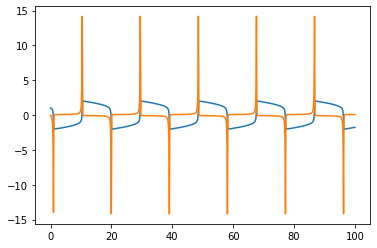

In [31]:
plt.plot(t2,x2)
plt.plot(t2,y2)

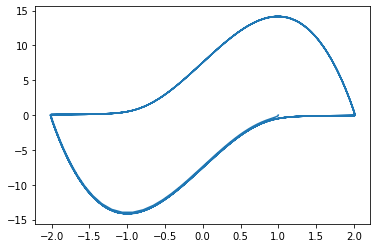

In [32]:
plt.plot(x2,y2)

In [33]:
# Exercise 3

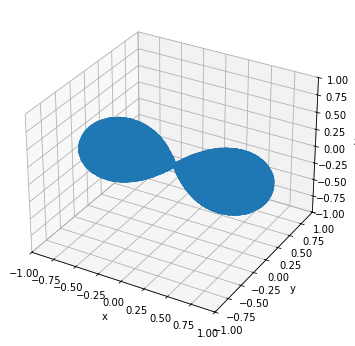

The area of the lemniscate is 0.453822 u^2.


In [34]:
def sampling(N=10**6,a=1):
    x = np.random.random(N)*2-1
    y = np.random.random(N)-0.5 # To centre about origin
    z = np.random.random(N)-0.5
    xs,ys,zs = [],[],[]
    for i in range(len(x)):
        if (x[i]**2+y[i]**2+z[i]**2)**2 <= a**2*(x[i]**2-y[i]**2-z[i]**2):
            xs.append(x[i])
            ys.append(y[i])
            zs.append(z[i])
    return xs,ys,zs

x,y,z = sampling()
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

A = 2*len(x)/10**6 #The ratio between the area of the lemniscate and the prism should equal the ratio of points inside the
# surface and total points
print("The area of the lemniscate is %.6f u^2."%A)